## Dragon Real Estate - Price Predictor


In [313]:
import pandas as pd

In [314]:
housing = pd.read_csv("data.csv")

In [315]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [316]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [317]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [318]:
for i in housing.columns:
    print(i)
    print(housing[i].value_counts())

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: CRIM, Length: 504, dtype: int64
ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64
INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: INDUS, Length: 76, dtype: int64
CHAS
0    471
1     35
Name: CHAS, dtype: int64
NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385     1
0.389     1
0.435     1
Name: NOX, Length: 81, dtype: int64
RM
5.713    3
6.167    3
6.127  

In [319]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [320]:
%matplotlib inline

In [321]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

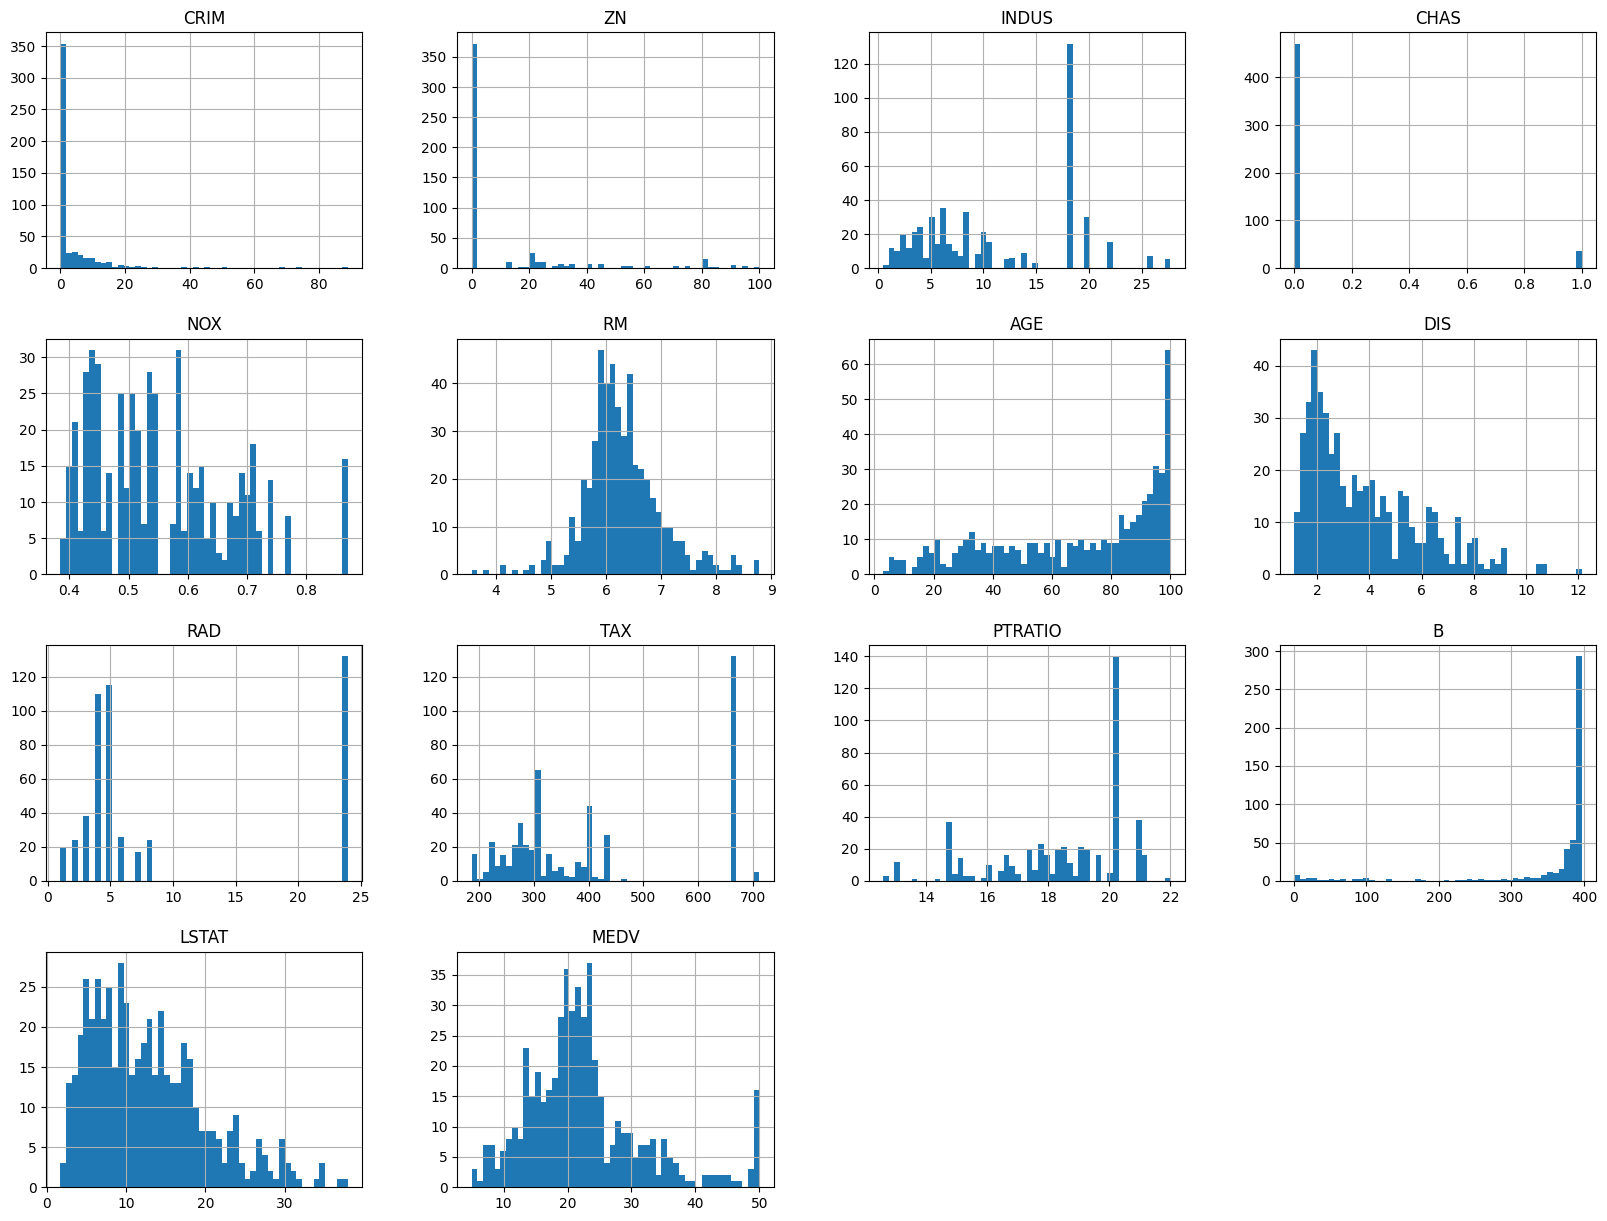

In [322]:
housing.hist(bins = 50 , figsize = (20,15))

In [323]:
plt.show()

## Test Train Split

In [324]:
from sklearn.model_selection import train_test_split as split

In [325]:
train,test = split(housing, test_size = 0.2 , random_state = 42 , shuffle = True)

In [326]:
train.shape

(404, 14)

In [327]:
test.shape

(102, 14)

In [328]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    


In [329]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [330]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [331]:
strat_train_set['CHAS'].value_counts(),strat_test_set['CHAS'].value_counts()

(0    376
 1     28
 Name: CHAS, dtype: int64,
 0    95
 1     7
 Name: CHAS, dtype: int64)

## looking for corelations

In [332]:
coor_matrix = housing.corr()
coor_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='B', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='B', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='B', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='B'>,
        <AxesSubplot:xlabel='RM', ylabel='B'>,
        <AxesSubplot:xlabel='ZN', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='B'>],
       [<AxesSu

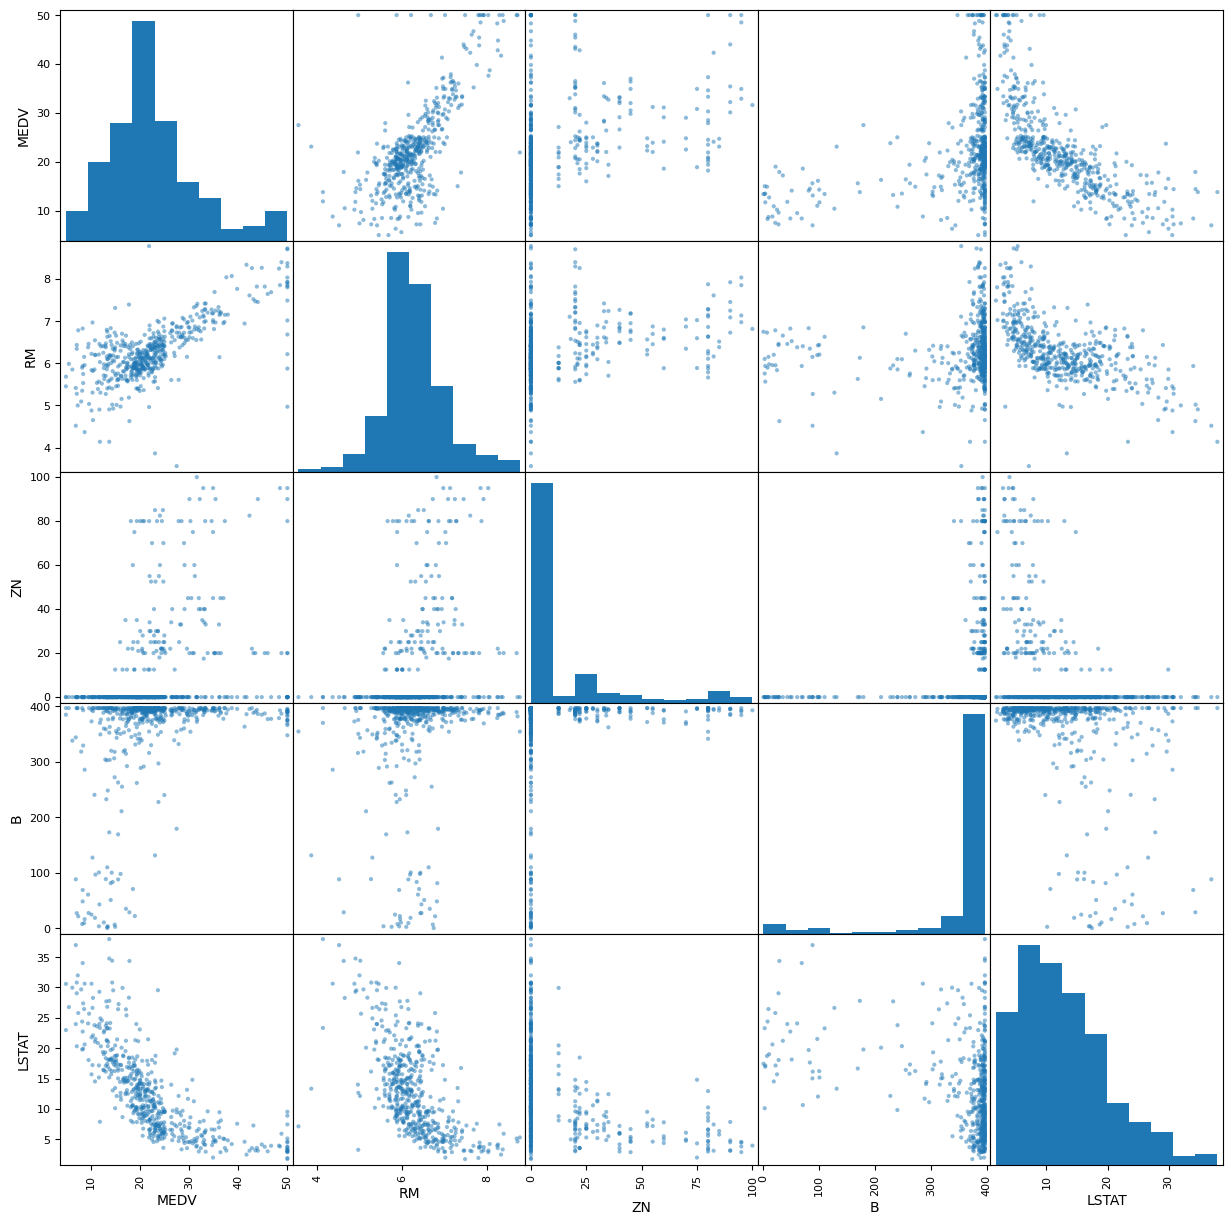

In [333]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','B','LSTAT']
scatter_matrix(housing[attributes],figsize=(15,15))

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

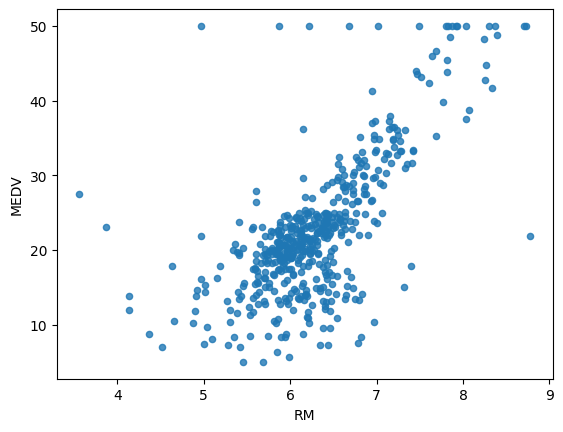

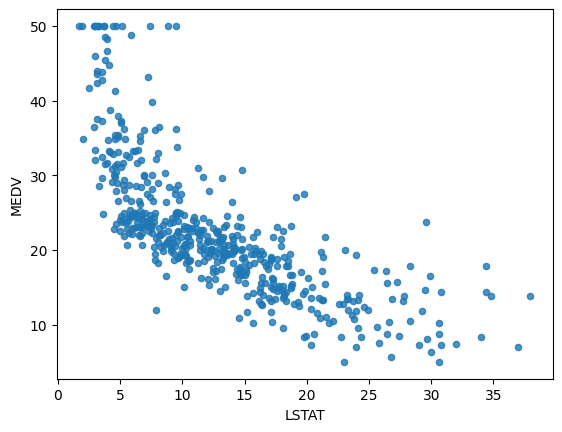

In [334]:
housing.plot(kind='scatter',x='RM',y='MEDV', alpha = 0.8)
housing.plot(kind='scatter',x='LSTAT',y='MEDV',alpha = 0.8)

<AxesSubplot:xlabel='LSTAT', ylabel='RM'>

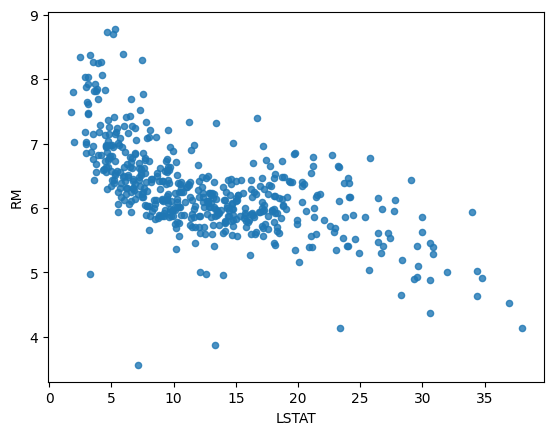

In [335]:
housing.plot(kind='scatter',x='LSTAT',y='RM',alpha = 0.8)


## Attribute Combinations

In [336]:
housing["TAXRM"]=housing['TAX']/housing['RM']
housing["TAXRM"]

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [337]:
corrmat = housing.corr()
corrmat["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

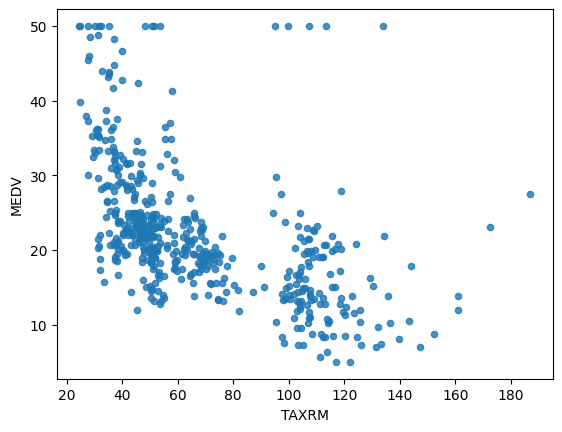

In [338]:
housing.plot(kind='scatter',y='MEDV',x='TAXRM',alpha=0.8)

In [339]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()


## missing attributes

In [340]:
# to take care of missing attributes  , you have three options 
# -> get rid of the missing data points
# -> get rid of whole attribute
# -> set the value to some value( 0, mean ,median)

In [341]:
# 1

a= housing["RM"].dropna()

In [342]:
# 2 
b = housing.drop("RM",axis = 1)


In [343]:
# 3
median = housing["RM"].median()
c = housing.fillna(median)

## using imputer

In [344]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [345]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [346]:
x = imputer.transform(housing)


In [347]:
housing_tr = pd.DataFrame( x, columns=housing.columns)


In [348]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Sklearn design 

primarily three types of object :

estimators - it estimates some parameters based on a dataset. Eg imputer . it has a fit method and transform method . Fit methods - fits the dataset and calculates internal parameters 

transformers - transform method takes input and returns output based on learning from fit(). it also has a convenience function called fit_transform() which fits and transforms.

predictors - linearRegression model is an example of predictor . fit() and predictor() are two types of common functions . it also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of features scaling methods:

1) min-max scaling (normalisation) 

    (value-min)/(max-min)

2) standardization

    (value -mean)/std

## Creating pipeline


In [349]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])


In [350]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## selecting desired model for dragon real estates

In [351]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model = LinearRegression().fit(housing_num_tr,housing_labels)
model1 = DecisionTreeRegressor().fit(housing_num_tr,housing_labels)
model2 = RandomForestRegressor().fit(housing_num_tr,housing_labels)



In [352]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)



In [353]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)  
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.829321492635759

In [354]:
housing_predictions = model1.predict(housing_num_tr)  
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [355]:
housing_predictions = model2.predict(housing_num_tr)  
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2152968375937399

## using better evaluation technique - crossValidation

In [356]:
def print_scores(scores):
    print('scores',scores)
    print('mean:',scores.mean())
    print('std:',scores.std())

In [357]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , housing_num_tr , housing_labels , scoring="neg_mean_squared_error",cv= 10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

scores [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
mean: 5.030437102767305
std: 1.0607661158294837


In [358]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1 , housing_num_tr , housing_labels , scoring="neg_mean_squared_error",cv= 10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

scores [4.24462357 5.63309039 5.51890321 3.84698171 3.9406535  2.97611324
 6.88961175 3.78899723 3.36897611 4.26769844]
mean: 4.447564914441293
std: 1.1388705316796837


In [359]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2 , housing_num_tr , housing_labels , scoring="neg_mean_squared_error",cv= 10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

scores [2.92268097 2.73673057 4.55591165 2.67396156 3.39203628 2.72181576
 4.90181986 3.34650325 3.19668344 3.30357822]
mean: 3.3751721568008017
std: 0.7275861463155315


In [360]:
from joblib import dump,load
dump(model2,'dragon.joblib')

['dragon.joblib']